# Exploratory Data Analysis

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os
from scipy.stats import zscore
from scipy.stats import shapiro

### Getting familiar with the data

In [23]:
# We'll start by loading our data into a DataFrame

load_dotenv() # load environment variables from .env file

data_path = os.getenv("data")
if data_path is None:
    raise ValueError("Environment variable 'data' is not set.")
file_path = os.path.join(data_path, "synthetic_insurance_data.csv")
data = pd.read_csv(file_path)

df = pd.DataFrame(data)
df

,Age,Is_Senior,Marital_Status,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Type,Policy_Adjustment,Premium_Amount,Safe_Driver_Discount,Multi_Policy_Discount,Bundling_Discount,Total_Discounts,Source_of_Lead,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Region,Premium_Adjustment_Region
0,47,0,Married,86,<1 year,100,0,Low,0,Liability-Only,-200,2186,0,0,0,0,Online,30,1,4,1,2,2,693.506910,50,Rural,0
1,37,0,Married,86,1-5 years,50,1,Low,50,Liability-Only,-200,2186,0,0,0,0,Referral,19,0,6,3,1,9,804.915794,-50,Urban,100
2,49,0,Married,86,>5 years,0,0,Low,0,Full Coverage,0,2286,0,0,0,0,Agent,10,0,4,5,1,12,787.667917,-50,Urban,100
3,62,1,Married,86,>5 years,0,0,Low,0,Liability-Only,-200,1986,1,0,0,50,Online,2,0,8,3,2,4,716.430710,-50,Suburban,50
4,36,0,Single,0,1-5 years,50,0,Medium,0,Full Coverage,0,2200,0,0,0,0,Online,21,0,1,2,3,9,764.093571,-50,Suburban,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,59,1,Single,0,1-5 years,50,0,Low,0,Full Coverage,0,2350,0,0,0,0,Agent,21,0,6,1,2,2,648.442873,50,Urban,100
9996,18,0,Divorced,0,1-5 years,50,2,Medium,200,Liability-Only,-200,2100,0,1,0,50,Online,17,1,5,3,3,8,754.045831,-50,Rural,0
9997,29,0,Married,86,1-5 years,50,1,Low,50,Full Coverage,0,2336,0,1,0,50,Online,12,1,8,3,1,1,647.460386,50,Rural,0
9998,47,0,Single,0,1-5 years,50,0,Low,0,Liability-Only,-200,2050,0,0,0,0,Agent,7,0,5,4,1,9,784.388476,-50,Urban,100


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 10000 non-null  int64  
 1   Is_Senior                           10000 non-null  int64  
 2   Marital_Status                      10000 non-null  object 
 3   Married_Premium_Discount            10000 non-null  int64  
 4   Prior_Insurance                     10000 non-null  object 
 5   Prior_Insurance_Premium_Adjustment  10000 non-null  int64  
 6   Claims_Frequency                    10000 non-null  int64  
 7   Claims_Severity                     10000 non-null  object 
 8   Claims_Adjustment                   10000 non-null  int64  
 9   Policy_Type                         10000 non-null  object 
 10  Policy_Adjustment                   10000 non-null  int64  
 11  Premium_Amount                      10000 

In [25]:
df.describe()

,Age,Is_Senior,Married_Premium_Discount,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Adjustment,Policy_Adjustment,Premium_Amount,Safe_Driver_Discount,Multi_Policy_Discount,Bundling_Discount,Total_Discounts,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Premium_Adjustment_Region
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,39.991700,0.159300,41.933600,45.370000,0.496800,37.385000,-79.840000,2216.656400,0.201200,0.305800,0.097100,30.205000,15.490600,0.57840,5.026800,1.989500,1.996900,7.423700,714.643320,-12.170000,64.195000
std,14.050358,0.365974,42.988924,34.694142,0.713331,67.264881,97.951691,148.605327,0.400917,0.460768,0.296109,33.675234,8.698798,0.49384,2.243833,1.412016,0.816429,4.016963,49.671796,48.498725,39.241636
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,1800.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,1.000000,530.184649,-50.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,2100.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.00000,3.000000,1.000000,1.000000,4.000000,681.204690,-50.000000,50.000000
50%,39.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,2236.000000,0.000000,0.000000,0.000000,50.000000,16.000000,1.00000,5.000000,2.000000,2.000000,7.000000,714.981868,-50.000000,50.000000
75%,50.000000,0.000000,86.000000,50.000000,1.000000,50.000000,0.000000,2300.000000,0.000000,1.000000,0.000000,50.000000,23.000000,1.00000,6.000000,3.000000,3.000000,11.000000,748.212642,50.000000,100.000000
max,90.000000,1.000000,86.000000,100.000000,5.000000,800.000000,0.000000,3050.000000,1.000000,1.000000,1.000000,150.000000,30.000000,1.00000,15.000000,9.000000,3.000000,14.000000,850.000000,50.000000,100.000000


### Data quality checks

In [26]:
df.isnull().sum()

Age                                   0
Is_Senior                             0
Marital_Status                        0
Married_Premium_Discount              0
Prior_Insurance                       0
Prior_Insurance_Premium_Adjustment    0
Claims_Frequency                      0
Claims_Severity                       0
Claims_Adjustment                     0
Policy_Type                           0
Policy_Adjustment                     0
Premium_Amount                        0
Safe_Driver_Discount                  0
Multi_Policy_Discount                 0
Bundling_Discount                     0
Total_Discounts                       0
Source_of_Lead                        0
Time_Since_First_Contact              0
Conversion_Status                     0
Website_Visits                        0
Inquiries                             0
Quotes_Requested                      0
Time_to_Conversion                    0
Credit_Score                          0
Premium_Adjustment_Credit             0


In [27]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

### Numerical features

In [28]:
# stats for numeric features
df.select_dtypes('number').describe().T[['mean','std','min','max']]

,mean,std,min,max
Age,39.99170,14.050358,18.000000,90.0
Is_Senior,0.15930,0.365974,0.000000,1.0
Married_Premium_Discount,41.93360,42.988924,0.000000,86.0
Prior_Insurance_Premium_Adjustment,45.37000,34.694142,0.000000,100.0
Claims_Frequency,0.49680,0.713331,0.000000,5.0
Claims_Adjustment,37.38500,67.264881,0.000000,800.0
Policy_Adjustment,-79.84000,97.951691,-200.000000,0.0
Premium_Amount,2216.65640,148.605327,1800.000000,3050.0
Safe_Driver_Discount,0.20120,0.400917,0.000000,1.0
Multi_Policy_Discount,0.30580,0.460768,0.000000,1.0


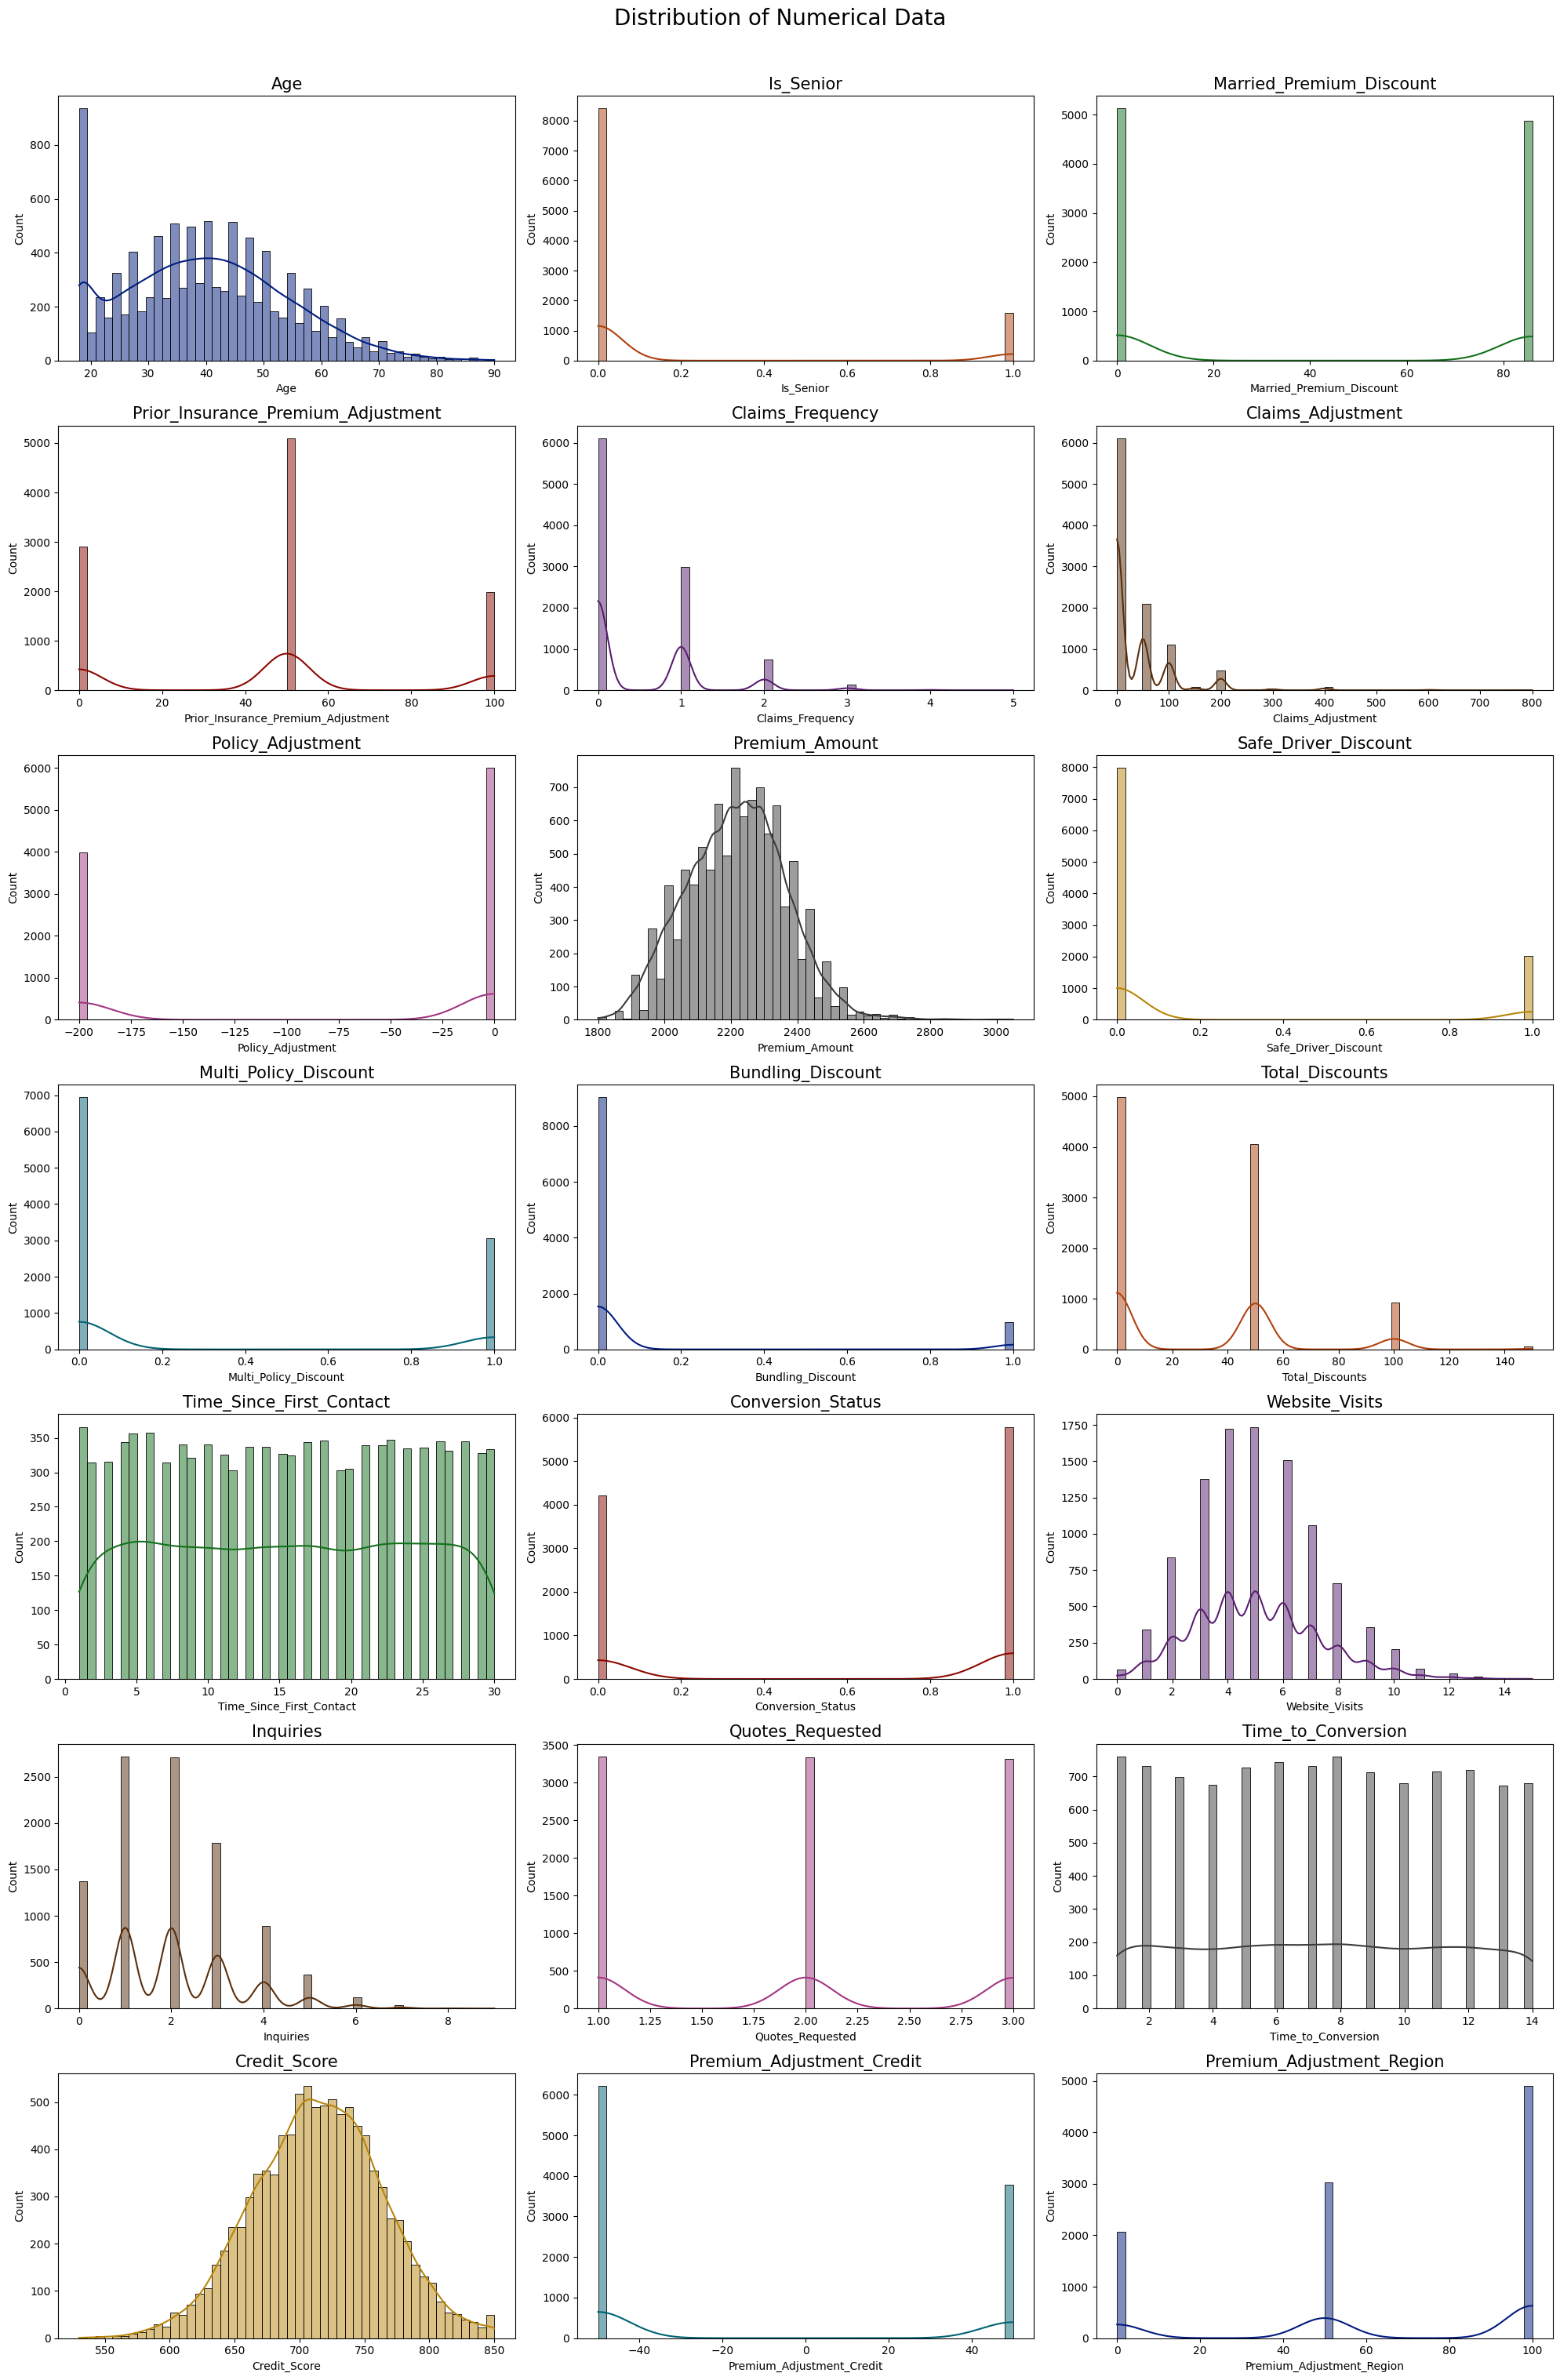

In [29]:
# plot histograms for the numeric features

numerical = df.select_dtypes('number').columns.to_list()

palette = sns.color_palette("dark", len(numerical))

fig, axes = plt.subplots(7,3, figsize = (20,30))

fig.suptitle("Distribution of Numerical Data", fontsize = 20, y = 1.01)

axes = axes.flatten()

for i,ax in enumerate(axes):
        sns.histplot(df[numerical[i]],bins=50, ax=ax, kde=True, color=palette[i])
        ax.set_title(numerical[i], fontsize =15)
        
plt.tight_layout()

visuals_path = os.getenv("visuals")
plt.savefig(os.path.join(visuals_path, "numerical_features_histogramm.png"))

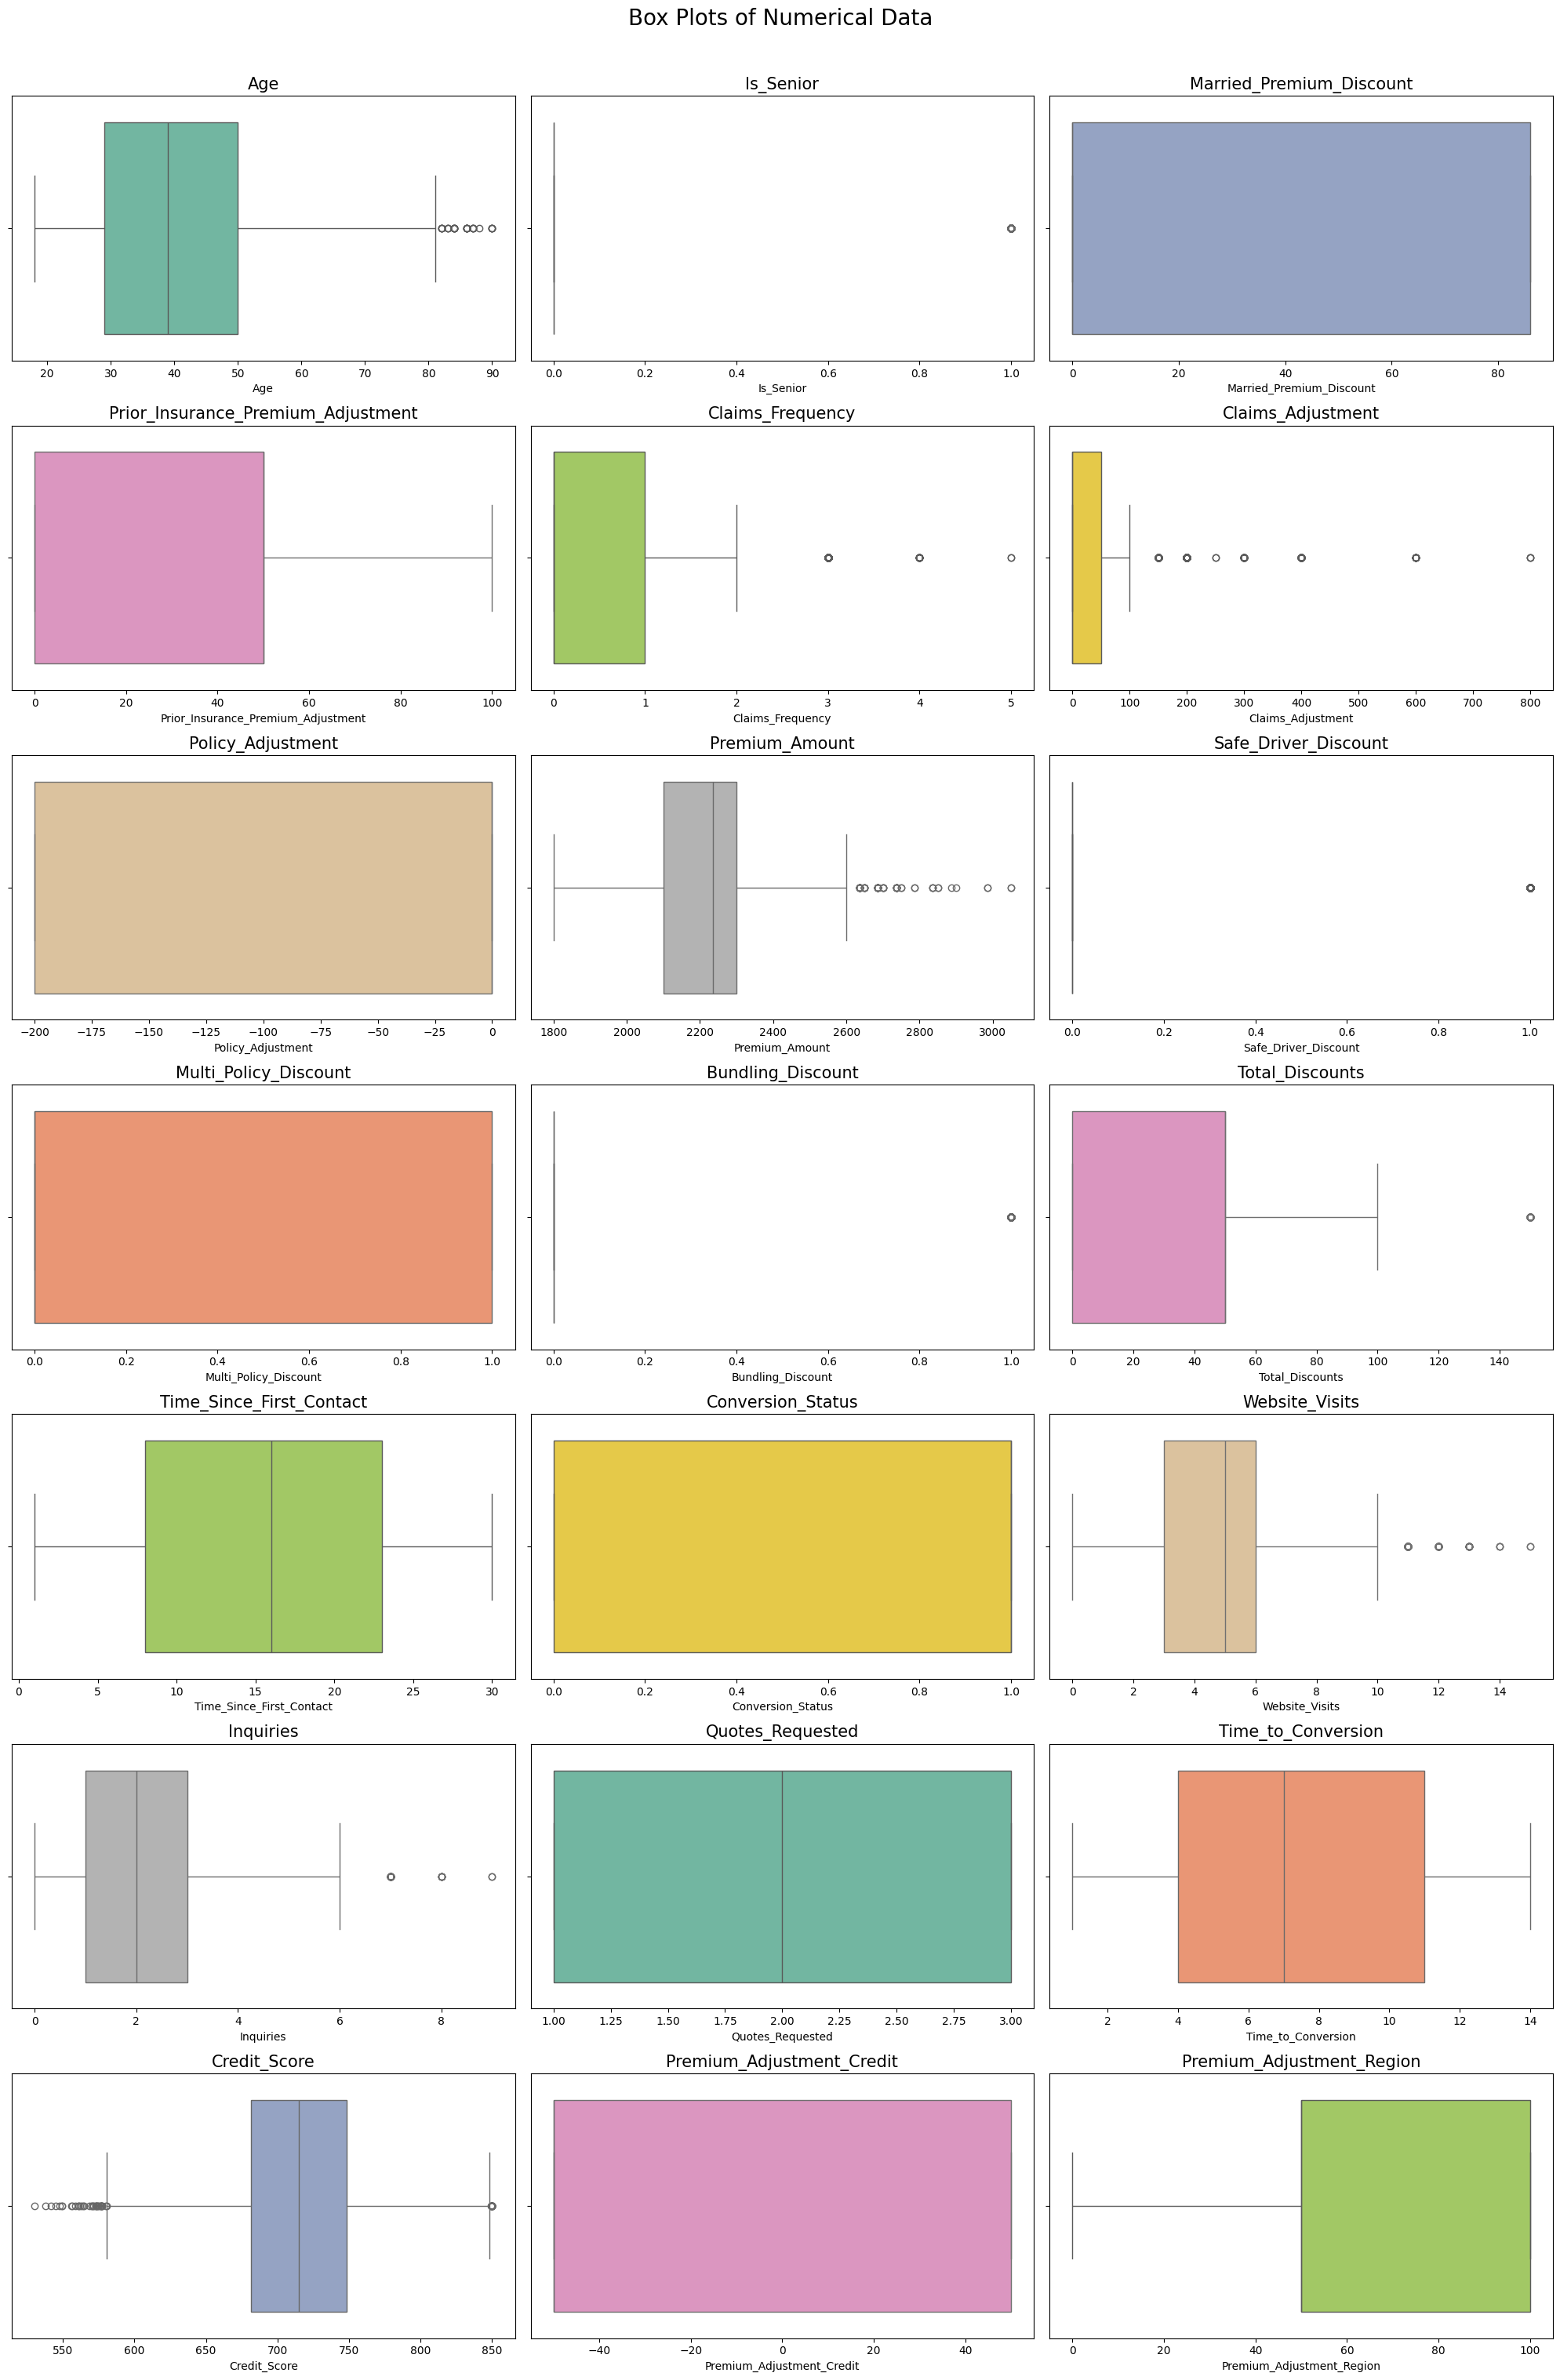

In [30]:
fig, axes = plt.subplots(7,3,figsize=(20,30))

fig.suptitle("Box Plots of Numerical Data", fontsize=20, y=1.01)

pallete = sns.color_palette("Set2",len(numerical))

axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.boxplot(data=df,x=df[numerical[i]],ax=ax, color=pallete[i])
    ax.set_title(f"{numerical[i]}", fontsize = 15)
    
plt.tight_layout()

plt.savefig(os.path.join(visuals_path,"numerical_features_boxplot.png"))

### Categorical features

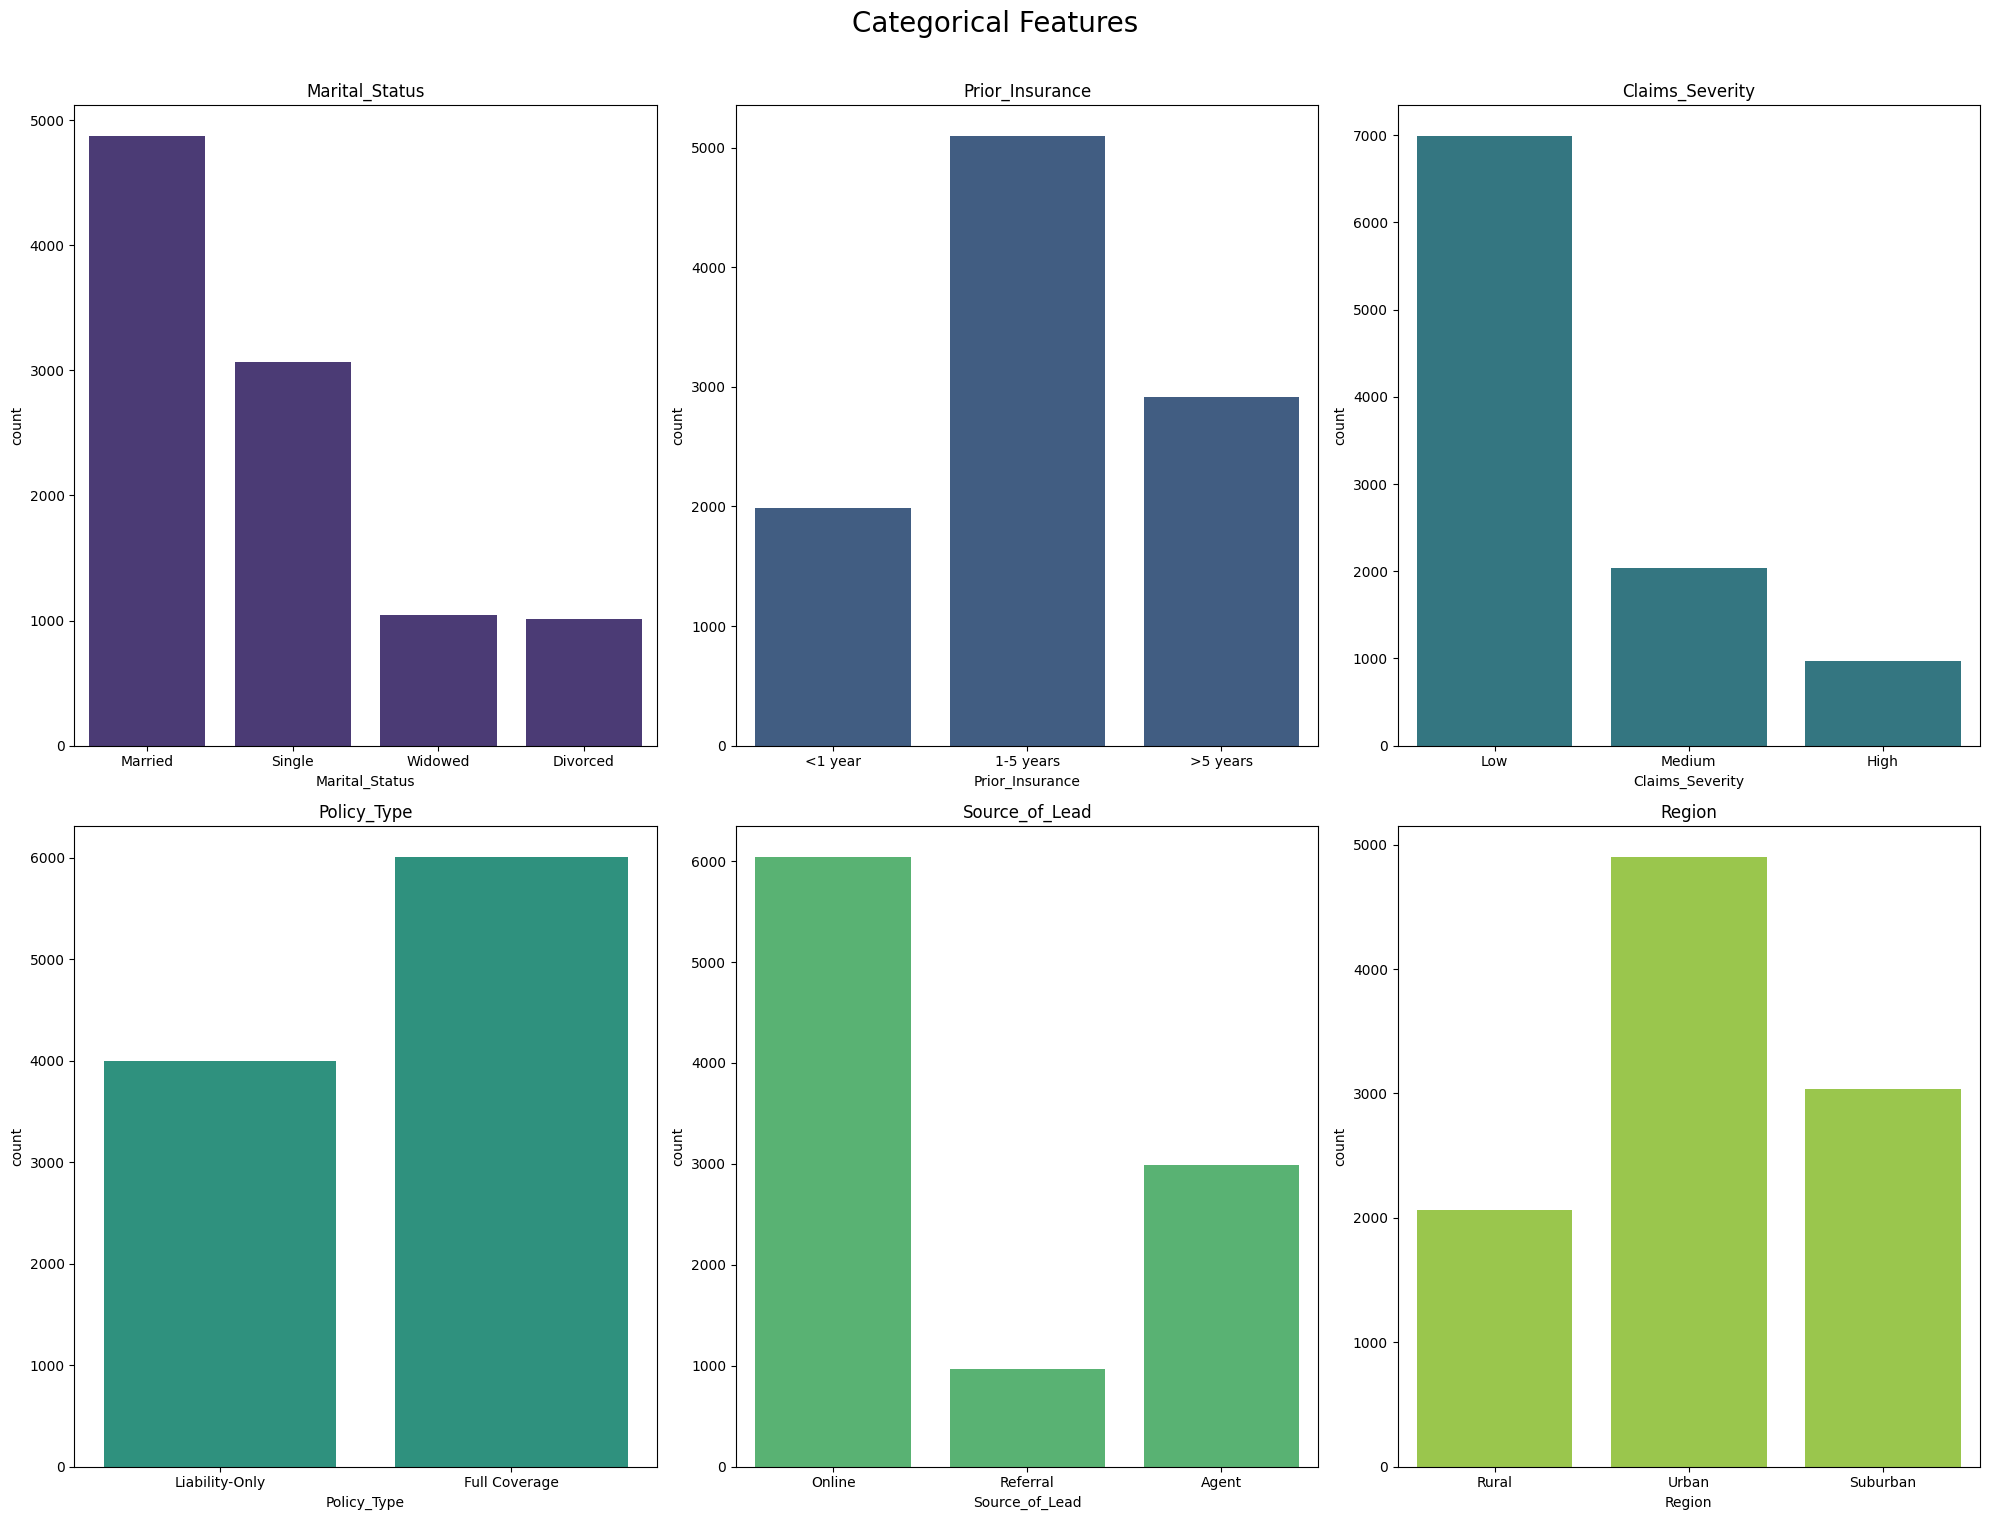

In [31]:
categorical = df.select_dtypes('object').columns.to_list()

fig, axes = plt.subplots(2,3, figsize= (20,15))

fig.suptitle("Categorical Features", y=1.01, fontsize=20)

axes = axes.flatten() 

pallete = sns.color_palette("viridis",len(categorical))

for i, ax in enumerate(axes):
    sns.countplot(data=df, x=categorical[i], ax=ax, color=pallete[i])
    ax.set_title(categorical[i])

plt.tight_layout()

plt.savefig(os.path.join(visuals_path,"categorical_features_bar_plot.png"))

### Correlation Matrix

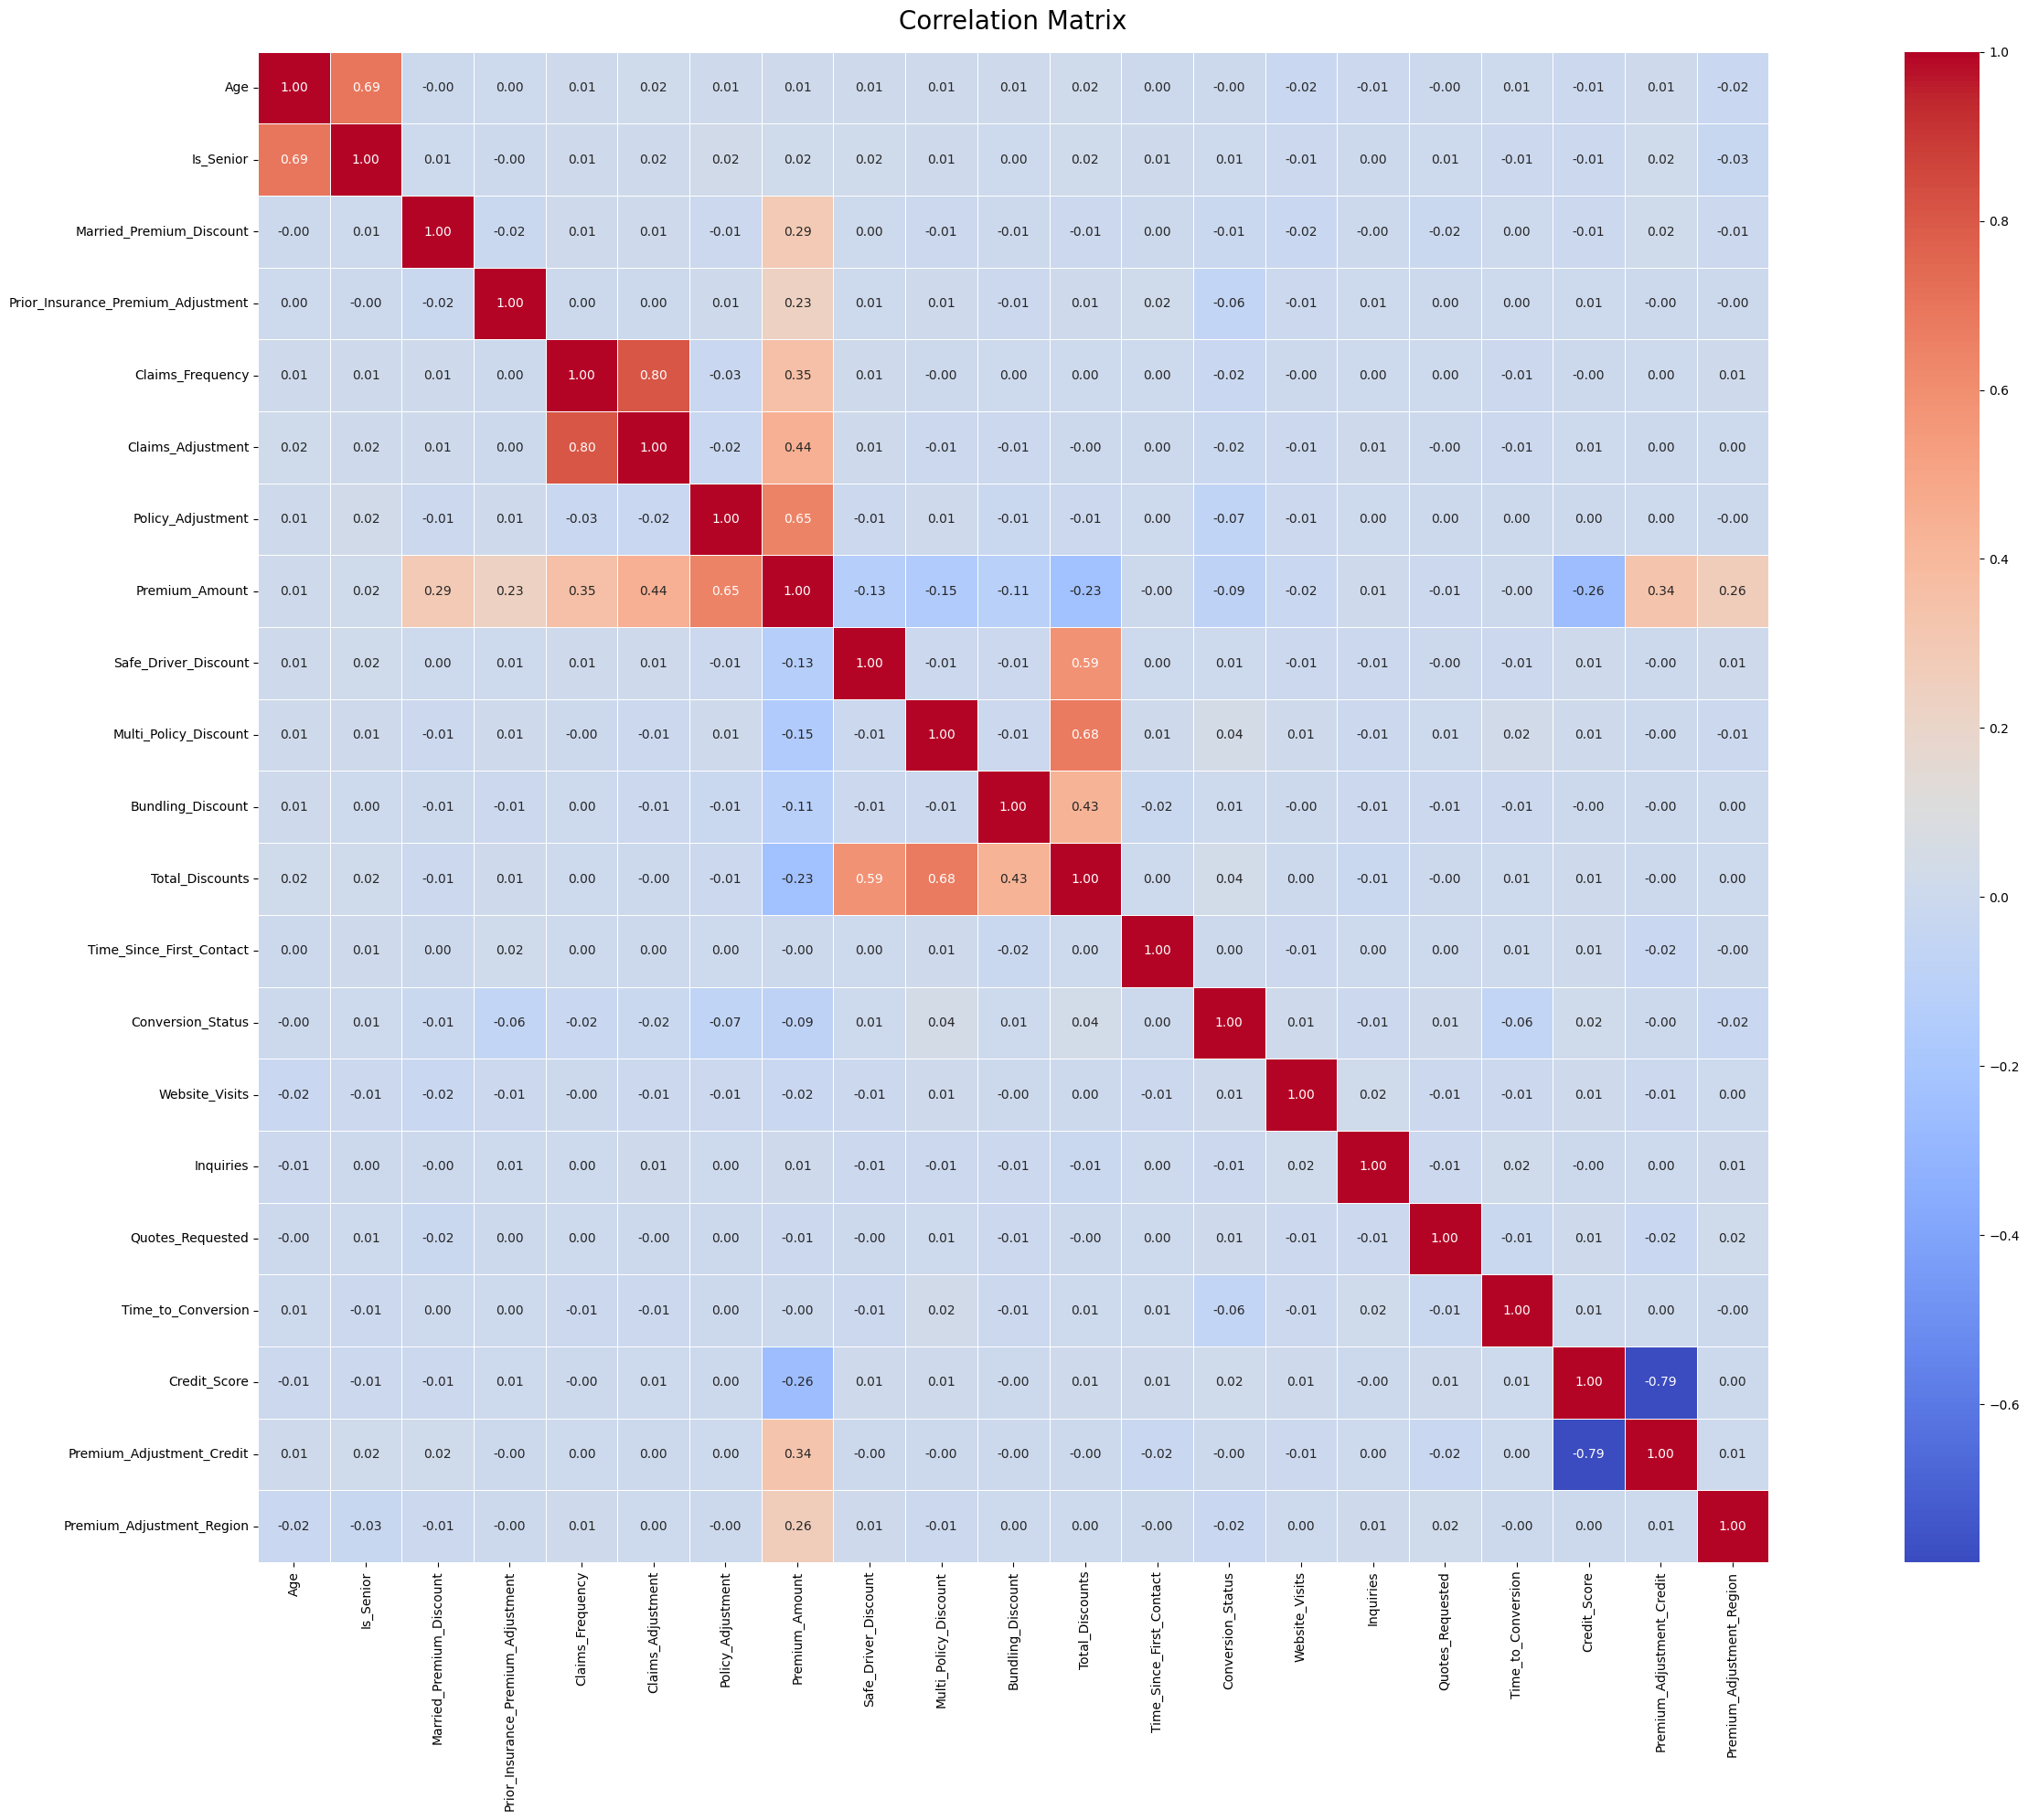

In [32]:
num_df = df.select_dtypes('number')
correlation_matrix = num_df.corr()

plt.figure(figsize=(30,20))

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True,
    linewidths=0.5
)
plt.title("Correlation Matrix", fontsize=20, y=1.01)

plt.tight_layout()

plt.savefig(os.path.join(visuals_path,"correlation_matrix.png"))

### Outlier Analysis

In [33]:
# don't suppress columns
pd.set_option('display.max_columns', None)

In [34]:
outlier_df = num_df
for col in outlier_df.columns:
    outlier_df[f"{col}_outlier"] = (np.abs(zscore(outlier_df[col])) > 3)
outlier_df

,Age,Is_Senior,Married_Premium_Discount,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Adjustment,Policy_Adjustment,Premium_Amount,Safe_Driver_Discount,Multi_Policy_Discount,Bundling_Discount,Total_Discounts,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Premium_Adjustment_Region,Age_outlier,Is_Senior_outlier,Married_Premium_Discount_outlier,Prior_Insurance_Premium_Adjustment_outlier,Claims_Frequency_outlier,Claims_Adjustment_outlier,Policy_Adjustment_outlier,Premium_Amount_outlier,Safe_Driver_Discount_outlier,Multi_Policy_Discount_outlier,Bundling_Discount_outlier,Total_Discounts_outlier,Time_Since_First_Contact_outlier,Conversion_Status_outlier,Website_Visits_outlier,Inquiries_outlier,Quotes_Requested_outlier,Time_to_Conversion_outlier,Credit_Score_outlier,Premium_Adjustment_Credit_outlier,Premium_Adjustment_Region_outlier
0,47,0,86,100,0,0,-200,2186,0,0,0,0,30,1,4,1,2,2,693.506910,50,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,37,0,86,50,1,50,-200,2186,0,0,0,0,19,0,6,3,1,9,804.915794,-50,100,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,49,0,86,0,0,0,0,2286,0,0,0,0,10,0,4,5,1,12,787.667917,-50,100,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,62,1,86,0,0,0,-200,1986,1,0,0,50,2,0,8,3,2,4,716.430710,-50,50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,36,0,0,50,0,0,0,2200,0,0,0,0,21,0,1,2,3,9,764.093571,-50,50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,59,1,0,50,0,0,0,2350,0,0,0,0,21,0,6,1,2,2,648.442873,50,100,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,18,0,0,50,2,200,-200,2100,0,1,0,50,17,1,5,3,3,8,754.045831,-50,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,29,0,86,50,1,50,0,2336,0,1,0,50,12,1,8,3,1,1,647.460386,50,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,47,0,0,50,0,0,-200,2050,0,0,0,0,7,0,5,4,1,9,784.388476,-50,100,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [35]:
outlier_df = outlier_df.iloc[:, 21:]
outlier_df

,Age_outlier,Is_Senior_outlier,Married_Premium_Discount_outlier,Prior_Insurance_Premium_Adjustment_outlier,Claims_Frequency_outlier,Claims_Adjustment_outlier,Policy_Adjustment_outlier,Premium_Amount_outlier,Safe_Driver_Discount_outlier,Multi_Policy_Discount_outlier,Bundling_Discount_outlier,Total_Discounts_outlier,Time_Since_First_Contact_outlier,Conversion_Status_outlier,Website_Visits_outlier,Inquiries_outlier,Quotes_Requested_outlier,Time_to_Conversion_outlier,Credit_Score_outlier,Premium_Adjustment_Credit_outlier,Premium_Adjustment_Region_outlier
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [36]:
column_sums = outlier_df.sum()

In [37]:
new_df = pd.DataFrame(column_sums)
new_df.columns = ['Count_of_outliers']
new_df

,Count_of_outliers
Age_outlier,24
Is_Senior_outlier,0
Married_Premium_Discount_outlier,0
Prior_Insurance_Premium_Adjustment_outlier,0
Claims_Frequency_outlier,160
Claims_Adjustment_outlier,129
Policy_Adjustment_outlier,0
Premium_Amount_outlier,42
Safe_Driver_Discount_outlier,0
Multi_Policy_Discount_outlier,0
